In [73]:
import os 
import sys

print("the current working directory is: ", os.getcwd())

the current working directory is:  /Users/Benny/Documents/ICL/NLP/nlp_cw1


In [2]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs, MultiLabelClassificationModel, MultiLabelClassificationArgs
from urllib import request
import pandas as pd
import logging
import torch
from collections import Counter
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import string
import re



/opt/homebrew/Caskroom/miniforge/base/envs/env_NLP_CW1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Direclty copied from the dontpatronizeme repo
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [4]:
# Direclty copied from the dontpatronizeme repo
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py"
module_name = module_url.split('/')[-1]
print(f'Fetching {module_url}')
#with open("file_1.txt") as f1, open("file_2.txt") as f2
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/evaluation.py


In [5]:

from dont_patronize_me import DontPatronizeMe

dpm = DontPatronizeMe('.', 'dontpatronizeme_pcl.tsv')


In [50]:
sns.set_theme(style="whitegrid", palette=['skyblue', 'orange'])

  par_id      art_id    keyword country  \
0      1  @@24942188   hopeless      ph   
1      2  @@21968160    migrant      gh   
2      3  @@16584954  immigrant      ie   
3      4   @@7811231   disabled      nz   
4      5   @@1494111    refugee      ca   

                                                text  label orig_label  
0  We 're living in times of absolute insanity , ...      0          0  
1  In Libya today , there are countless number of...      0          0  
2  "White House press secretary Sean Spicer said ...      0          0  
3  Council customers only signs would be displaye...      0          0  
4  """ Just like we received migrants fleeing El ...      0          0  
(10469, 7)
Number of unique labels: 2
Unique labels: [0 1]
Number of each label: label
0    9476
1     993
Name: count, dtype: int64
Number of unique orginal labels: 5
Unique original labels: ['0' '1' '2' '3' '4']
Number of each original label: orig_label
0    8529
1     947
3     458
4     391
2     1

Text(0, 0.5, 'Number of instances')

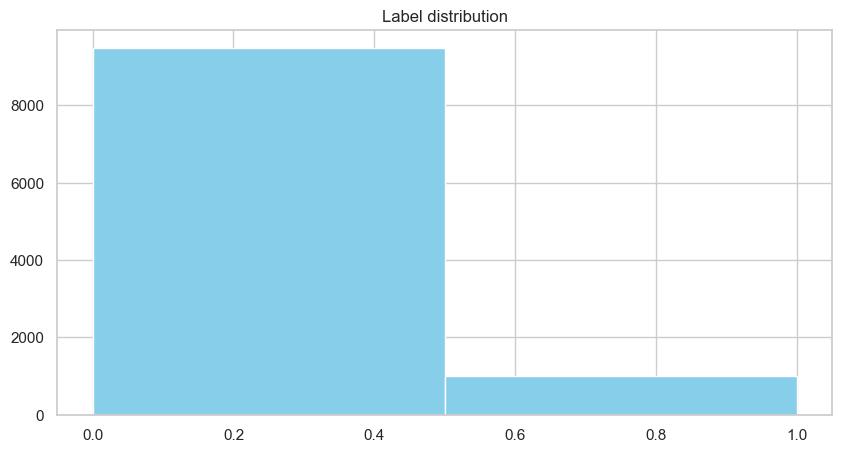

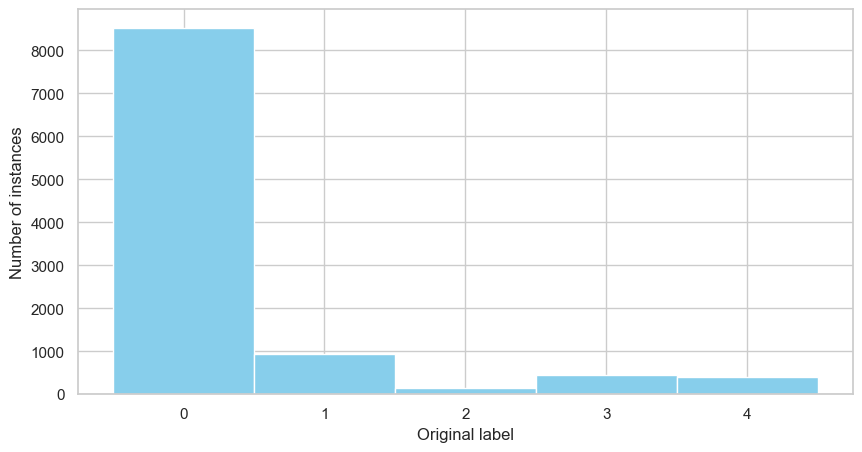

In [51]:
# This method loads the subtask 1 data
dpm.load_task1()
# which we can then access as a dataframe
task_1_df = dpm.train_task1_df
print(task_1_df.head())
print(task_1_df.shape)

num_labels = len(task_1_df['label'].unique())
print(f'Number of unique labels: {num_labels}')
print(f'Unique labels: {task_1_df["label"].unique()}')
print(f'Number of each label: {task_1_df["label"].value_counts()}')

# Plots for the feautes of text vs the labels

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('Label distribution')
plt.hist(task_1_df['label'], bins=num_labels)


num_orig_labels = len(task_1_df['orig_label'].unique())
print(f'Number of unique orginal labels: {num_orig_labels}')
print(f'Unique original labels: {task_1_df["orig_label"].unique()}')

print(f'Number of each original label: {task_1_df["orig_label"].value_counts()}')

# Plots for number of each original labels

plt.figure(figsize=(10, 5))
plt.hist(task_1_df['orig_label'], bins=5, align='left', range=(0, 5))
plt.xlabel('Original label')
plt.ylabel('Number of instances')


In [52]:

texts_list= list(task_1_df['text'])
pos_index = task_1_df.loc[task_1_df['label'] == 1].index
pos_texts = [texts_list[i] for i in pos_index] 
words_pos = [text.split(' ') for text in pos_texts] 
sentances_pos = [re.split('[.!?]+',text) for text in pos_texts] 
neg_index = task_1_df.loc[task_1_df['label'] == 0].index
neg_texts = [texts_list[i] for i in neg_index]
words_neg = [text.split(' ') for text in neg_texts]
sentances_neg = [re.split('[.!?]+',text) for text in neg_texts]

for paragarph in words_pos:
  for word in paragarph:
    if word in string.punctuation:
      paragarph.remove(word)
      
for paragarph in words_neg:
  for word in paragarph:
    if word in string.punctuation:
      paragarph.remove(word)
      
      




(array([1.610e+02, 7.100e+02, 1.624e+03, 2.215e+03, 1.891e+03, 1.259e+03,
        8.220e+02, 6.120e+02, 3.790e+02, 2.500e+02, 1.760e+02, 1.130e+02,
        9.100e+01, 5.800e+01, 4.200e+01, 2.700e+01, 1.100e+01, 1.200e+01,
        4.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

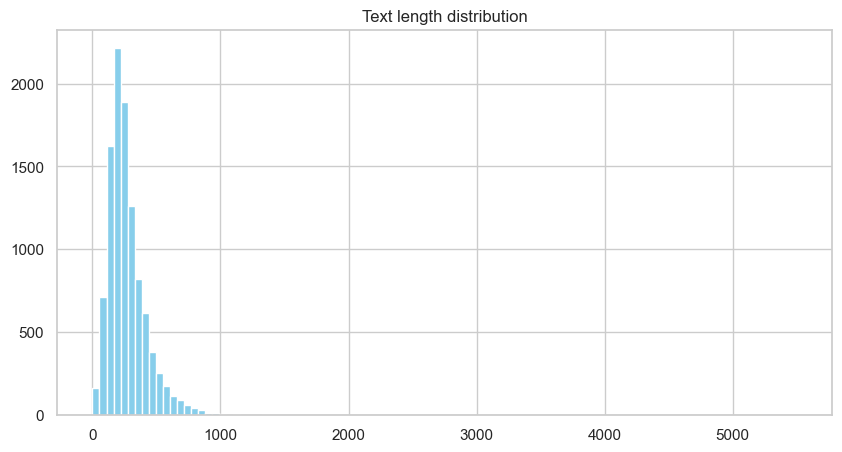

In [53]:
plt.figure(figsize=(10, 5))
plt.title('Text length distribution')

texts_list= list(task_1_df['text'])
text_lengths = np.array([len(text) for text in texts_list])
plt.hist(text_lengths, bins=100)


Text(0, 0.5, 'Density')

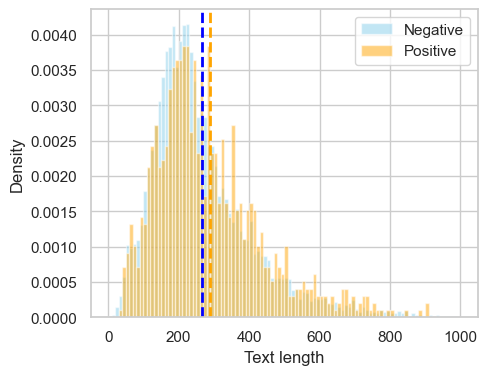

In [68]:

pos_text_lengths = text_lengths[pos_index]

neg_text_lengths = text_lengths[neg_index]



plt.figure(figsize=(5, 4))
plt.hist(neg_text_lengths, bins=100, alpha=0.5, label='Negative', range=(0, 1000), density=True)
plt.hist(pos_text_lengths, bins=100, alpha=0.5, label='Positive', range=(0, 1000), density=True)


plt.axvline(np.mean(pos_text_lengths), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(neg_text_lengths), color='blue', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Text length')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

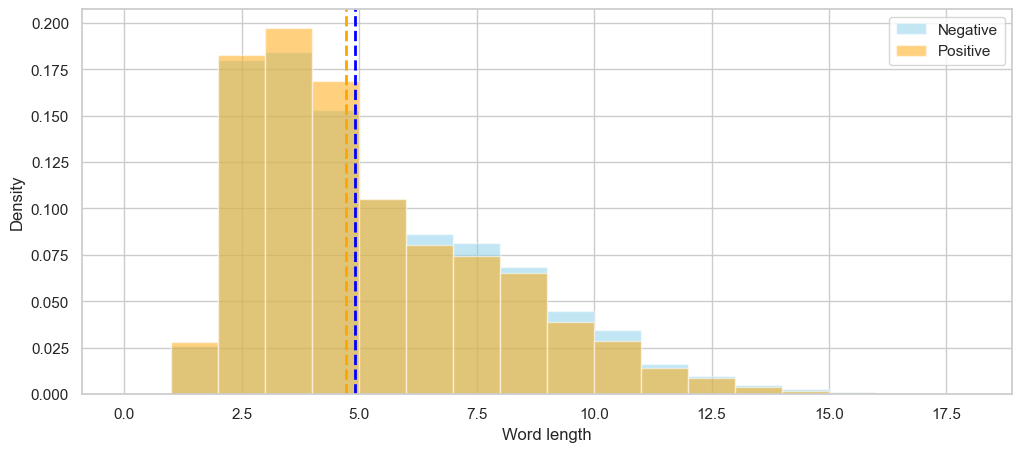

In [55]:


word_lengths_pos = [len(word) for text in words_pos for word in text]


word_lengths_neg = [len(word) for text in words_neg for word in text]


plt.figure(figsize=(12, 5))
plt.hist(word_lengths_neg, bins=18, alpha=0.5, label='Negative', range=(0, 18),density=True)
plt.hist(word_lengths_pos, bins=18, alpha=0.5, label='Positive', range=(0, 18),density=True)
plt.axvline(np.mean(word_lengths_pos), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(word_lengths_neg), color='blue', linestyle='dashed', linewidth=2)

plt.legend()
plt.xlabel('Word length')
plt.ylabel('Density')

In [56]:
 

num_i_pos = sum([1 for words in words_pos if 'I' in words])
num_i_neg = sum([1 for words in words_neg if 'I' in words])

percentage_with_i_pos = num_i_pos / len(words_pos)
percentage_with_i_neg = num_i_neg / len(words_neg)

print(f'Percentage of positive texts with "I": {percentage_with_i_pos}')
print(f'Percentage of negative texts with "I": {percentage_with_i_neg},')

plt.figure(figsize=(10, 5))






Percentage of positive texts with "I": 0.11883182275931521
Percentage of negative texts with "I": 0.06616715913887716,


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Average word length in positive texts: 4.39821579491032 std of: 2.7111537390353657
Average word length in negative texts: 4.564064528500675 std of: 2.8276830781427327


Text(0, 0.5, 'Density')

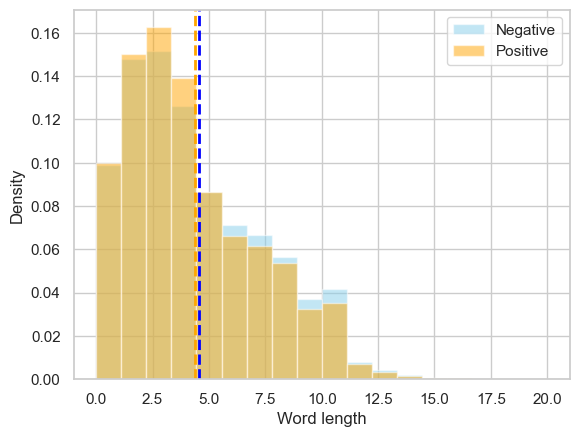

In [57]:
words_pos = [text.split(' ') for text in pos_texts]

words_neg = [text.split(' ') for text in neg_texts]

average_word_length_pos = np.mean([len(word) for words in words_pos for word in words])
average_word_length_neg = np.mean([len(word) for words in words_neg for word in words])

print(f'Average word length in positive texts: {average_word_length_pos} std of: {np.std([len(word) for words in words_pos for word in words])}')
print(f'Average word length in negative texts: {average_word_length_neg} std of: {np.std([len(word) for words in words_neg for word in words])}')

plt.hist([len(word) for words in words_neg for word in words], bins=18, alpha=0.5, label='Negative', range=(0, 20), density=True)
plt.hist([len(word) for words in words_pos for word in words], bins=18, alpha=0.5, label='Positive', range=(0, 20), density=True)


plt.axvline(average_word_length_pos, color='orange', linestyle='dashed', linewidth=2)
plt.axvline(average_word_length_neg, color='blue', linestyle='dashed', linewidth=2)

plt.legend()
plt.xlabel('Word length')
plt.ylabel('Density')

"
[[243], [66], [182, 111], [128], [56, 31, 131, 156, 80, 113], [113, 144, 139], [57, 148, 139], [180, 114], [138], [127, 249], [138, 109, 48, 91, 72, 32], [82, 94, 4], [209, 85, 66, 101, 135], [114, 176], [283, 29], [63, 224], [132], [238, 119, 114, 60, 138], [66, 135, 62, 4], [227], [117], [191], [72, 76], [264, 202, 4], [146, 137], [135, 126, 95], [154, 116, 263], [188], [100], [46, 181, 4], [215, 81], [97, 119, 45, 4], [49], [328], [74, 106, 100, 4], [232], [143, 116, 4], [3, 198, 8, 165, 12], [151, 93, 31, 210], [161], [228], [228], [77, 138, 64, 13], [199], [253, 4], [128, 86], [187, 4], [4, 1, 129, 113], [234, 92, 51, 19], [288], [101], [5, 2, 149, 156, 1], [194], [161, 172], [206, 40, 27], [79, 164], [206], [232, 123, 74, 151, 4], [42], [87], [128], [125, 91], [148, 87, 4], [78, 86, 75, 90, 110], [51, 186, 12], [155, 13], [88, 82, 113, 111, 4], [162, 48, 124, 273, 392], [113, 162, 89, 48], [100, 130, 90], [148], [102], [149], [357], [340], [111, 104, 144, 59, 42, 206], [151, 17

Text(0, 0.5, 'Density')

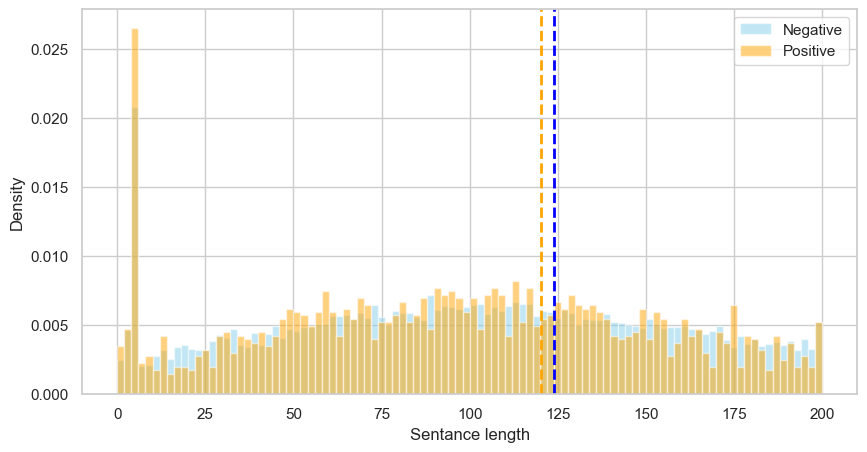

In [58]:

sentance_lengths_pos = [[len(sentance) for sentance in sentacnes] for sentacnes in sentances_pos]
for sentnace_lengths in sentance_lengths_pos:
  for length in sentnace_lengths:
    if length == 0 or length == 1:
      sentnace_lengths.remove(length)
      
      

sentance_lengths_neg = [[len(sentance) for sentance in sentacnes] for sentacnes in sentances_neg]
for sentnace_lengths in sentance_lengths_neg:
  for length in sentnace_lengths:
    if length == 0 or length == 1:
      sentnace_lengths.remove(length)
      
      
print(sentances_pos[5][3])
print(sentance_lengths_pos)


plt.figure(figsize=(10, 5))
plt.hist([length for lengths in sentance_lengths_neg for length in lengths], bins=100, alpha=0.5, label='Negative', range=(0, 200), density=True)
plt.hist([length for lengths in sentance_lengths_pos for length in lengths], bins=100, alpha=0.5, label='Positive', range=(0, 200), density=True)
plt.axvline(np.mean([length for lengths in sentance_lengths_pos for length in lengths]), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(np.mean([length for lengths in sentance_lengths_neg for length in lengths]), color='blue', linestyle='dashed', linewidth=2)

plt.legend()
plt.xlabel('Sentance length')
plt.ylabel('Density')

In [59]:

num_quotes_pos = sum([text.count('"') for text in pos_texts])
num_quotes_neg = sum([text.count('"') for text in neg_texts])

print(f'Perenctage of quotes in positive texts: {num_quotes_pos/len(pos_texts)}')
print(f'Perenctage of quotes in negative texts: {num_quotes_neg/len(neg_texts)}')



Perenctage of quotes in positive texts: 2.134944612286002
Perenctage of quotes in negative texts: 1.598775854791051


In [60]:

num_question_marks_pos = sum([text.count('?') for text in pos_texts])
num_question_marks_neg = sum([text.count('?') for text in neg_texts])

print(f'Perenctage of question marks in positive texts: {num_question_marks_pos/len(pos_texts)}')
print(f'Perenctage of question marks in negative texts: {num_question_marks_neg/len(neg_texts)}')


Perenctage of question marks in positive texts: 0.11983887210473314
Perenctage of question marks in negative texts: 0.08157450401013086


In [61]:


num_exclamation_marks_pos = sum([text.count('!') for text in pos_texts])
num_exclamation_marks_neg = sum([text.count('!') for text in neg_texts])

print(f'Perenctage of exclamation marks in positive texts: {num_exclamation_marks_pos/len(pos_texts)}')
print(f'Perenctage of exclamation marks in negative texts: {num_exclamation_marks_neg/len(neg_texts)}')


Perenctage of exclamation marks in positive texts: 0.027190332326283987
Perenctage of exclamation marks in negative texts: 0.0149852258336851


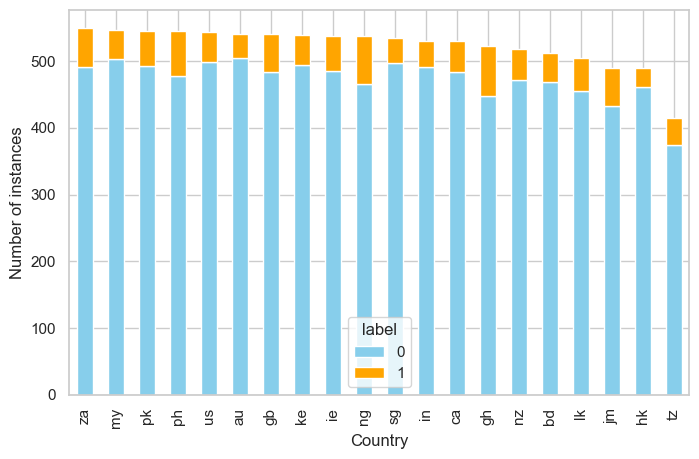

In [65]:


labels_per_country = task_1_df.groupby('country')['label'].value_counts().unstack().fillna(0)
labels_per_country['total'] = labels_per_country[0] + labels_per_country[1]
labels_per_country = labels_per_country.sort_values(by='total', ascending=False)
labels_per_country = labels_per_country.drop('total', axis=1)
labels_per_country.plot(kind='bar', stacked=True, figsize=(8, 5))

plt.ylabel('Number of instances')
plt.xlabel('Country')
plt.show()

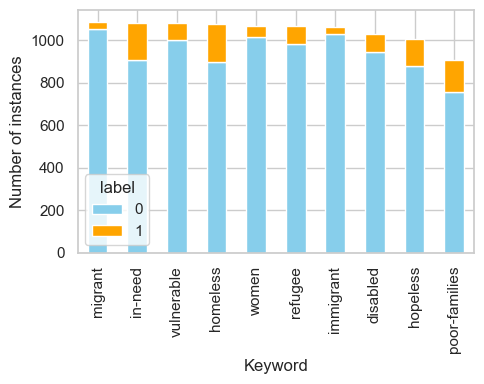

In [72]:


labels_per_keyword = task_1_df.groupby('keyword')['label'].value_counts().unstack()
labels_per_keyword['total'] = labels_per_keyword[0] + labels_per_keyword[1]
labels_per_keyword = labels_per_keyword.sort_values(by='total', ascending=False)
labels_per_keyword = labels_per_keyword.drop('total', axis=1)
labels_per_keyword.plot(kind='bar', stacked=True, figsize=(5, 4))

plt.ylabel('Number of instances', fontsize=12)
plt.xlabel('Keyword', fontsize=12)
plt.tight_layout()
plt.show()